C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features: Index(['StartTime', 'StartVerticalPosition', 'PeakVerticalVelocity',
       'StartHorizontalPosition', 'Slant', 'AverageAbsoluteVelocity',
       'AbsoluteyJerk', 'NormalizedyJerk', 'AverageNormalizedyJerkPerTrial',
       'NormalizedJerk'],
      dtype='object')
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 771ms/step - accuracy: 0.3021 - loss: 0.7718 - val_accuracy: 0.1176 - val_loss: 0.8215
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.3021 - loss: 0.7321 - val_accuracy: 0.2353 - val_loss: 0.7885
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.4167 - loss: 0.7161 - val_accuracy: 0.2941 - val_loss: 0.7600
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.4792 - loss: 0.7020 - val_accuracy: 0.2353 - val_loss: 0.7333
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.5208 - loss: 0.6798 - val_accuracy: 0.4118 - val_loss: 0.7093
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6146 - loss: 0.6633 - v

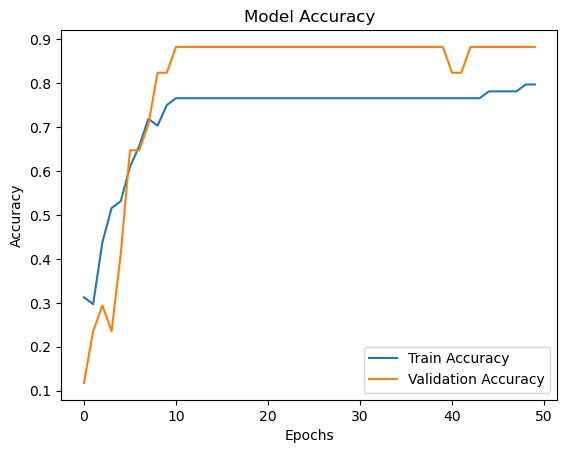

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 1: Load the CSV data
data = pd.read_csv("data.csv")  # Replace 'data.csv' with your file name

# Step 2: Preprocess the data
# Separate features and target label
X = data.drop(columns=["Class", "UID", "Trial", "TrialSeq"])  # Exclude non-feature columns
y = data["Class"]

# Encode the target label (e.g., "dys" = 1, "td" = 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 3: Feature selection using Random Forest
# Train a Random Forest model to determine feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Select top 10 features based on feature importance
selector = SelectFromModel(rf, prefit=True, max_features=10)
X_selected = selector.transform(X)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 5: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Build the DT-GCN model (Dynamic Temporal Graph Convolutional Network)
class DTGCNModel(tf.keras.Model):
    def __init__(self):
        super(DTGCNModel, self).__init__()
        self.hidden1 = layers.Dense(64, activation='relu')
        self.hidden2 = layers.Dense(32, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.hidden2(x)
        return self.output_layer(x)

# Initialize the model
model = DTGCNModel()

# Step 7: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 10: Test the model with predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Visualize training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save("dysgraphia_model_rf_selection.keras")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
[I 2025-01-26 15:58:52,013] A new study created in memory with name: no-name-fe4f12a1-5e53-495d-9a4e-3bddff114cd0
C:\Users\Lahari\AppData\Local\Temp\ipykernel_16240\277873879.py:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Lahari\AppData\Local\Temp\ipykernel_16240\277873879.py:52: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.5)


Selected Features: Index(['StartTime', 'StartVerticalPosition', 'PeakVerticalVelocity',
       'StartHorizontalPosition', 'Slant', 'AverageAbsoluteVelocity',
       'AbsoluteyJerk', 'NormalizedyJerk', 'AverageNormalizedyJerkPerTrial',
       'NormalizedJerk'],
      dtype='object')


[I 2025-01-26 15:58:54,514] Trial 0 finished with value: 0.8823529481887817 and parameters: {'num_units1': 64, 'num_units2': 16, 'learning_rate': 0.002174071183798409, 'batch_size': 32, 'dropout_rate': 0.10499433836171233}. Best is trial 0 with value: 0.8823529481887817.
[I 2025-01-26 15:58:56,770] Trial 1 finished with value: 0.8235294222831726 and parameters: {'num_units1': 48, 'num_units2': 64, 'learning_rate': 0.008286940844383436, 'batch_size': 64, 'dropout_rate': 0.2319406324255404}. Best is trial 0 with value: 0.8823529481887817.
[I 2025-01-26 15:58:58,913] Trial 2 finished with value: 0.8823529481887817 and parameters: {'num_units1': 32, 'num_units2': 40, 'learning_rate': 0.00022384889088380807, 'batch_size': 32, 'dropout_rate': 0.45403478601008407}. Best is trial 0 with value: 0.8823529481887817.
[I 2025-01-26 15:59:01,282] Trial 3 finished with value: 0.7058823704719543 and parameters: {'num_units1': 48, 'num_units2': 40, 'learning_rate': 0.00019385131216860437, 'batch_size':

Best Hyperparameters: {'num_units1': 64, 'num_units2': 16, 'learning_rate': 0.002174071183798409, 'batch_size': 32, 'dropout_rate': 0.10499433836171233}
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.6667 - loss: 0.6389 - val_accuracy: 0.8235 - val_loss: 0.6305
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7396 - loss: 0.5901 - val_accuracy: 0.8235 - val_loss: 0.5992
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7604 - loss: 0.5736 - val_accuracy: 0.8235 - val_loss: 0.5684
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7500 - loss: 0.5834 - val_accuracy: 0.8824 - val_loss: 0.5464
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7812 - loss: 0.5551 - val_accuracy: 0.8824 - val_loss: 0.5276
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7292 - loss: 0.5723 - val_accuracy: 0.8824 - val_loss: 0.5150
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7708 - loss: 0.5388 - val_accurac

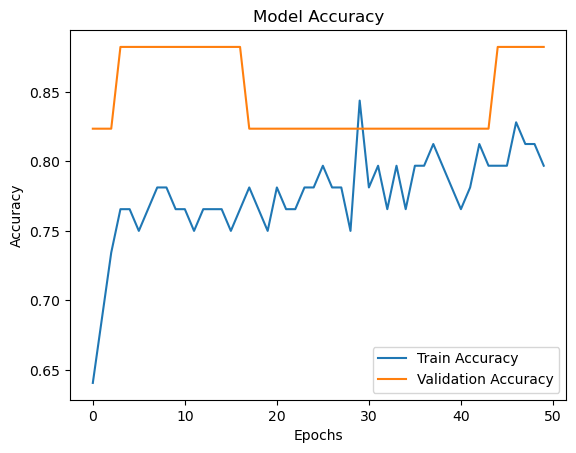

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from tensorflow.keras import layers, models
import optuna
import matplotlib.pyplot as plt

# Step 1: Load the CSV data
data = pd.read_csv("data.csv")  # Replace 'data.csv' with your file name

# Step 2: Preprocess the data
# Separate features and target label
X = data.drop(columns=["Class", "UID", "Trial", "TrialSeq"])  # Exclude non-feature columns
y = data["Class"]

# Encode the target label (e.g., "dys" = 1, "td" = 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 3: Feature selection using Random Forest
# Train a Random Forest model to determine feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Select top 10 features based on feature importance
selector = SelectFromModel(rf, prefit=True, max_features=10)
X_selected = selector.transform(X)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 5: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Define an optimization objective function for hyperparameter tuning
def objective(trial):
    # Suggest hyperparameters for the neural network
    num_units1 = trial.suggest_int("num_units1", 32, 128, step=16)
    num_units2 = trial.suggest_int("num_units2", 16, 64, step=8)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.5)
    
    # Build the model
    model = tf.keras.Sequential([
        layers.Dense(num_units1, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_units2, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=30, batch_size=batch_size, verbose=0)
    
    # Evaluate on validation data
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Step 7: Perform optimization using Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # Perform 20 trials to find the best hyperparameters

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Step 8: Train the final model with the best hyperparameters
final_model = tf.keras.Sequential([
    layers.Dense(best_params["num_units1"], activation='relu'),
    layers.Dropout(best_params["dropout_rate"]),
    layers.Dense(best_params["num_units2"], activation='relu'),
    layers.Dropout(best_params["dropout_rate"]),
    layers.Dense(1, activation='sigmoid')
])

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params["learning_rate"]),
                    loss='binary_crossentropy', metrics=['accuracy'])

history = final_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=50, batch_size=best_params["batch_size"], verbose=1)

# Step 9: Evaluate the final model
loss, accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Model Accuracy: {accuracy * 100:.2f}%")

# Step 10: Visualize the training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the final model
final_model.save("optimized_dysgraphia_model.keras")
